In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Predicting Song Genres

Before we get into any prediction, let's explore the dataset.

In [128]:
# load in the data
# data comes from https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
spotify_df = pd.read_csv('dataset.csv')
# take a look at the data
spotify_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [129]:
# get rid of any empties or duplicates
spotify_df.dropna(inplace=True)
spotify_df.drop_duplicates()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Seems like there was one empty entry or duplicate! We went from 114,000 rows to 113,999 rows.

In [130]:
# what columns do we have?
list(spotify_df.columns)

['Unnamed: 0',
 'track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre']

In [131]:
# how many genres are there in this dataset?
print(len(genres))

114


That's a lot of genres! And we will see below that they can be quite niche.

In [134]:
# what genres do we have?
genres = list(spotify_df['track_genre'].unique())
print(genres)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop', 'power-pop', 'progressive-house', 'psych-rock', 'punk-rock', 'punk', 'r-n-b', 'reggae', 'reggaeton', 'rock-n

In [135]:
# here we can see that there are 1000 songs in each genre
list(spotify_df['track_genre'].value_counts())

[1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 999]

Obviously, this is a lot of genres, but let's see how 3 different classification algorithms work on the full dataset. We will try K Nearest Neighbors, Random Forests, and Logistic Regression

## K Nearest Neighbors on All Genres

In [125]:
# let's try k nearest neighbors on the dataset in its current state
# drop the non numeric columns
X = spotify_df.drop(columns = ['Unnamed: 0','track_genre','track_id','artists','album_name','track_name','explicit'])
y = spotify_df['track_genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=13)

In [36]:
# create KNN classifier. let's find the optimal k in the range of 1 to 40
err_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the classifier to the data
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

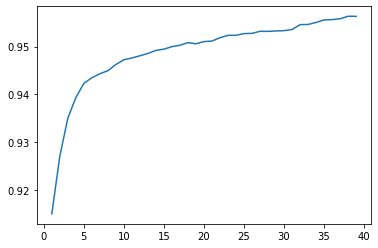

In [44]:
plt.plot(range(1,40), err_rate)

Okay, error rate is pretty high. knn doesn't do great on the full dataset of all genres. k = 3 seems best, though. let's try it just to see.

In [126]:
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier to the data
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

print("Accuracy score on the test data: ", accuracy_score(y_test, y_pred_test), 
      "\nAccuracy score on the training data: ", accuracy_score(y_train, y_pred_train))

Accuracy score on the test data:  0.06414473684210527 
Accuracy score on the training data:  0.39085366745127853


So, not a great accuracy, 6%. That's pretty bad-- but still a much better accuracy than guessing at random, which would be 0.8% accuracy. And the training is higher than the test, so it looks like we overfit. Let's try random forest and see how it does.

## Random Forest on All Genres

In [59]:
random_forest = RandomForestClassifier(random_state=13)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

y_pred_test = random_forest.predict(X_test)
accuracy_score(y_test, y_pred_test)
y_pred_train = random_forest.predict(X_train)
accuracy_score(y_train, y_pred_train)

print("Accuracy score on the test data: ", accuracy_score(y_test, y_pred_test), 
      "\nAccuracy score on the training data: ", accuracy_score(y_train, y_pred_train))

Accuracy score on the test data:  0.32344298245614034 
Accuracy score on the training data:  0.8574415204678363


Ouch. That is overfit-- the testing accuracy and the training accuracy are way off from each other.

In [66]:
# let's try random forest as we do not want to overfit
acc_score_diff = []
max_depth_num = []
test_acc = []
train_acc = []

for i in [3,5,7,9]:
    random_forest = RandomForestClassifier(max_depth = i, random_state=13)
    random_forest.fit(X_train, y_train)
    
    # predict on test and train data
    y_pred_test = random_forest.predict(X_test)
    y_pred_train = random_forest.predict(X_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    
    # see the difference in the accuracy scores
    acc_score_diff.append(abs(test_accuracy - train_accuracy))
    max_depth_num.append(i)
    test_acc.append(test_accuracy)
    train_acc.append(train_accuracy)

We would like to know what the optimal max depth number is-- so let's make a dataframe of each max depth number with the accuracy score difference and the test and train accuracy, just to see. From research, a max depth number of 3-8ish is best, but I would like to actually see what 

In [67]:
# make a dictionary of the above results
d = {'max depth': max_depth_num, 
    'accuracy score difference': acc_score_diff,
    'test accuracy': test_acc,
    'train accuracy': train_acc}

# put into a dataframe
rf_df = pd.DataFrame(d)
rf_df

,max depth,accuracy score difference,test accuracy,train accuracy
0,3,0.003808,0.138048,0.141857
1,5,0.007120,0.190658,0.197778
2,7,0.018999,0.231820,0.250819
3,9,0.046659,0.269803,0.316462


So a max depth of 5 is giving us a decent test and train accuracy. 19% is a lot better than the previous 6% with k nearest neighbors. 

## Logistic Regression

In [136]:
logr = LogisticRegression(multi_class='multinomial', random_state=13)
logr.fit(X_train,y_train)

y_pred_test = logr.predict(X_test)
y_pred_train = logr.predict(X_train)

print("Accuracy score on the test data: ", accuracy_score(y_test, y_pred_test), 
      "\nAccuracy score on the training data: ", accuracy_score(y_train, y_pred_train))

Accuracy score on the test data:  0.03655701754385965 
Accuracy score on the training data:  0.03690112428544277


Worse than k nearest neighbors!

## Restricted Genres

I would like to know how classifiers would perform if I restricted the genres to just a handful-- rock, pop, classical, country, electronic, and hip-hop.

In [105]:
spotify_df2 = spotify_df[(spotify_df['track_genre'] == 'rock') 
                          | (spotify_df['track_genre'] == 'pop')
                          | (spotify_df['track_genre'] == 'classical')
                          | (spotify_df['track_genre'] == 'country')
                          | (spotify_df['track_genre'] == 'electronic') 
                          | (spotify_df['track_genre'] == 'hip-hop')]

## K Nearest Neighbors on Restricted Genres

In [106]:
X = spotify_df2.drop(columns = ['Unnamed: 0','track_genre','track_id','artists','album_name','track_name','explicit'])
y = spotify_df2['track_genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=13)

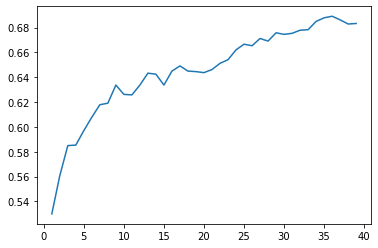

In [107]:
err_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the classifier to the data
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,40), err_rate)

In [114]:
# okay, let's go with k = 3 then
knn = KNeighborsClassifier(n_neighbors = 3)
# fit the classifier to the data
knn.fit(X_train,y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

print("Accuracy score on the test data: ", accuracy_score(y_test, y_pred_test), 
      "\nAccuracy score on the training data: ", accuracy_score(y_train, y_pred_train))

Accuracy score on the test data:  0.415 
Accuracy score on the training data:  0.6536111111111111


Seems like we overfit! Not great.

## Random Forests

In [116]:
# as with above, let's use max depth = 5
random_forest = RandomForestClassifier(max_depth = 5, random_state=13)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

y_pred_test = random_forest.predict(X_test)
y_pred_train = random_forest.predict(X_train)

print("Accuracy score on the test data: ", accuracy_score(y_test, y_pred_test), 
      "\nAccuracy score on the training data: ", accuracy_score(y_train, y_pred_train))

Accuracy score on the test data:  0.6695833333333333 
Accuracy score on the training data:  0.6911111111111111


It also does not look like we overfit too much here. Random forest seems to do really well.

## Logistic Regression

In [115]:
logr = LogisticRegression(multi_class='multinomial', random_state=13)
logr.fit(X_train,y_train)

y_pred_test = logr.predict(X_test)
y_pred_train = logr.predict(X_train)

print("Accuracy score on the test data: ", accuracy_score(y_test, y_pred_test), 
      "\nAccuracy score on the training data: ", accuracy_score(y_train, y_pred_train))

Accuracy score on the test data:  0.33 
Accuracy score on the training data:  0.34055555555555556


It doesn't look like we overfit and 33% is a decent accuracy-- better than guessing at random.

## Final Thoughts

It is hard to predict genre when using the full dataset. On the restricted dataset it is a lot easier, which makes sense! Some next steps would be to try other classifiers and to tune my models a lot more. It would also be interesting to look into which features are the most important when it comes to predicting genre. And, could a similar thing be done with the other features-- say, predict a song's tempo based off of this data-- and find a good classifier with good accuracy?